# **Week 1 - Data Foundation and Cleaning**

In [9]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Loading Dataset
df = pd.read_csv("Indian_Kids_Screen_Time.csv")

# Quick overview
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns")
df.head()

Dataset contains 9712 rows and 8 columns


,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [11]:
print("Dataset Info")
# Data types and non-null counts
df.info()

Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


In [12]:
# Descriptive Statistics for Numeric Columns
print("Descriptive Statistics for Numeric Columns:")
display(df.describe())

# Descriptive Statistics for Object (Categorical) Columns
print("Descriptive Statistics for Object Columns:")
display(df.describe(include=["O"]))

Descriptive Statistics for Numeric Columns:


,Age,Avg_Daily_Screen_Time_hr,Educational_to_Recreational_Ratio
count,9712.000000,9712.000000,9712.000000
mean,12.979201,4.352837,0.427226
std,3.162437,1.718232,0.073221
min,8.000000,0.000000,0.300000
25%,10.000000,3.410000,0.370000
50%,13.000000,4.440000,0.430000
75%,16.000000,5.380000,0.480000
max,18.000000,13.890000,0.600000


Descriptive Statistics for Object Columns:


,Gender,Primary_Device,Health_Impacts,Urban_or_Rural
count,9712,9712,6494,9712
unique,2,4,15,2
top,Male,Smartphone,Poor Sleep,Urban
freq,4942,4568,2268,6851


Missing Values per Column:


,Missing Values
Age,0
Gender,0
Avg_Daily_Screen_Time_hr,0
Primary_Device,0
Exceeded_Recommended_Limit,0
Educational_to_Recreational_Ratio,0
Health_Impacts,3218
Urban_or_Rural,0


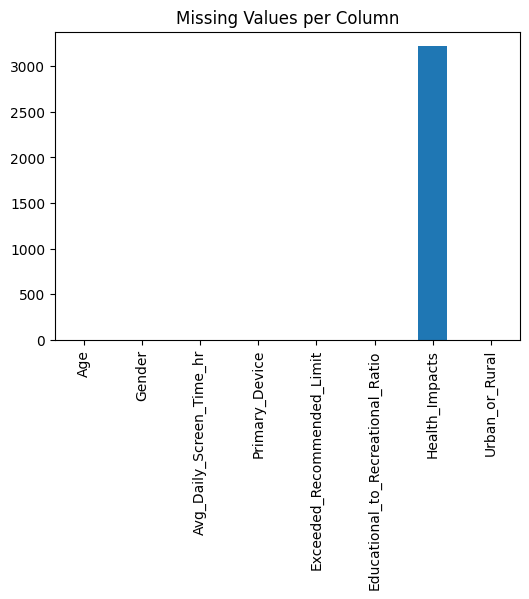


 Number of Duplicate Rows: 44


In [13]:
# Missing values
print("Missing Values per Column:")
display(df.isnull().sum().to_frame("Missing Values"))

# Visualizing missing values
df.isnull().sum().plot(kind="bar", figsize=(6,4))
plt.title("Missing Values per Column")
plt.show()

# Duplicate Values
print(f"\n Number of Duplicate Rows: {df.duplicated().sum()}")

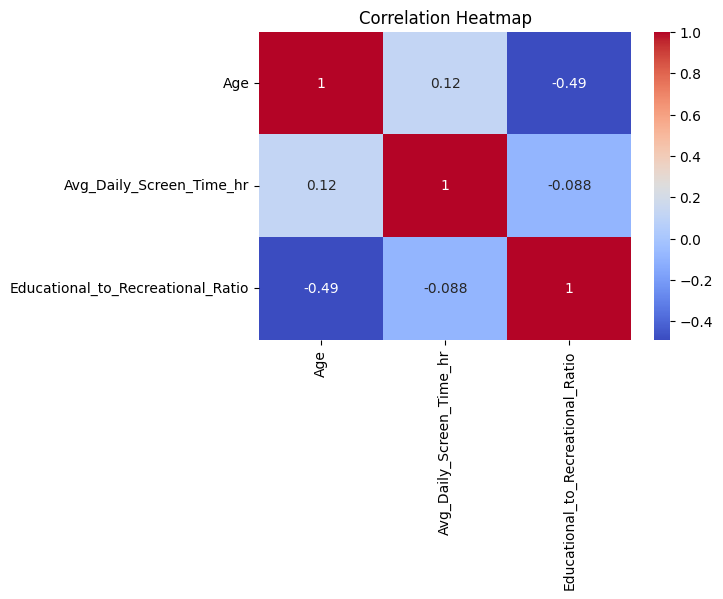

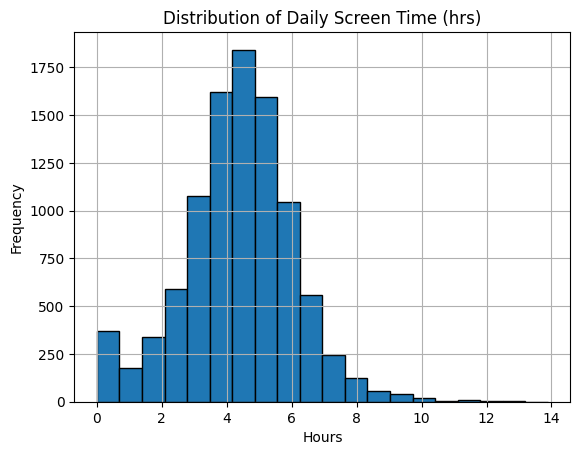

In [14]:
# Correlation Heatmap
plt.figure(figsize=(6,4))

# Selected only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
print("\n")

# Distribution of Screen Time
df['Avg_Daily_Screen_Time_hr'].hist(bins=20, edgecolor='black')
plt.title("Distribution of Daily Screen Time (hrs)")
plt.xlabel("Hours")
plt.ylabel("Frequency")
plt.show()

In [15]:
# Outlier Detection (IQR)
Q1 = df['Avg_Daily_Screen_Time_hr'].quantile(0.25)
Q3 = df['Avg_Daily_Screen_Time_hr'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Avg_Daily_Screen_Time_hr'] < (Q1 - 1.5*IQR)) |
              (df['Avg_Daily_Screen_Time_hr'] > (Q3 + 1.5*IQR))]
print(f" Number of Outliers detected: {outliers.shape[0]}")
outliers.head()

 Number of Outliers detected: 448


,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
19,9,Female,0.00,TV,False,0.42,NaN,Urban
28,8,Male,0.31,Smartphone,False,0.51,NaN,Urban
36,10,Male,11.68,TV,True,0.47,Poor Sleep,Urban
46,9,Female,0.00,Smartphone,False,0.47,NaN,Urban
58,9,Male,0.00,Smartphone,False,0.59,NaN,Rural


---
# **Week 1 Key Insights :-**

---
# ***I. Dataset Overview***
---
*   The dataset comprises 9712 records and 8 distinct features, detailing the screen time habits of children in India between the ages of 8 and 18.

*   The mean daily screen time is 4.35 hours, with a median of 4.44 hours.

*   The demographic breakdown indicates a majority of participants reside in Urban areas (70.5%) and the Smartphone is the most frequently used primary device (47%). The gender distribution is nearly even.
---
# ***II. Data Quality and Integrity***
*   Missing Values: No Missing Values Found.

*   Duplicate Records: The analysis identified 44 duplicate rows within the dataset.

*   Outliers: Using the Interquartile Range (IQR) method on the Avg_Daily_Screen_Time_hr variable, 448 records were identified as outliers. These data points represent children with screen time habits that are statistically extreme compared to the central tendency of the data.
---
# ***III. Analytical Findings***
---


*   Variable Correlations: The correlation analysis revealed no significant linear relationship between the primary numeric variables: Age, Avg_Daily_Screen_Time_hr, and Educational_to_Recreational_Ratio.

*   Data Distribution: The distribution of Avg_Daily_Screen_Time_hr approximates a normal distribution, centered around a mean of approximately 4-5 hours.

*   Reported Health Impacts: Among the non-null entries, "Poor Sleep" was the most frequently reported health impact associated with screen time.
---

# **Week 2 - Preprocessing and Feature Engineering**

In [16]:
#Importing Library and Loading Dataset
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Indian_Kids_Screen_Time.csv')

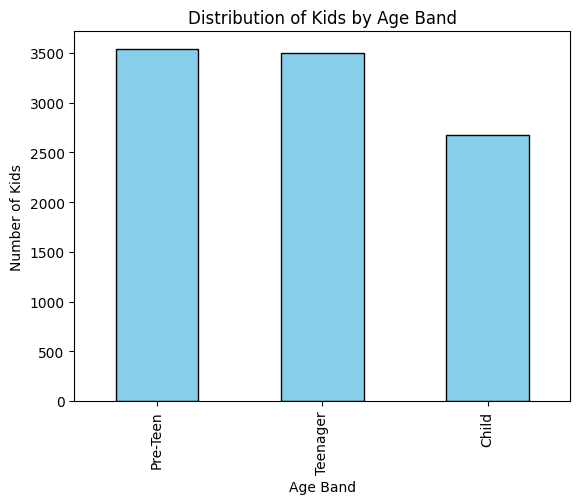

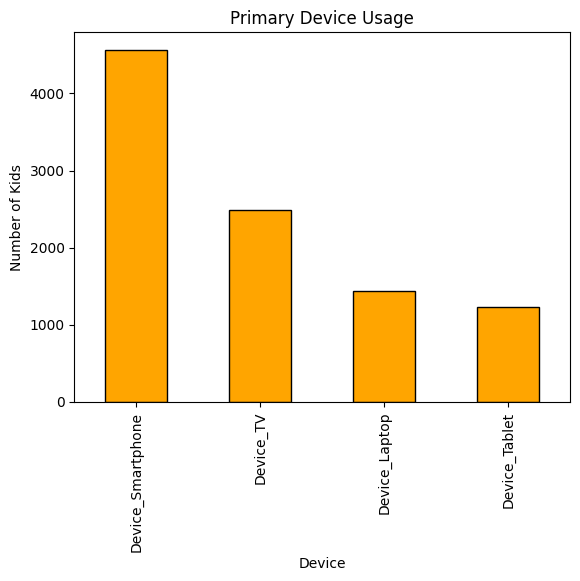

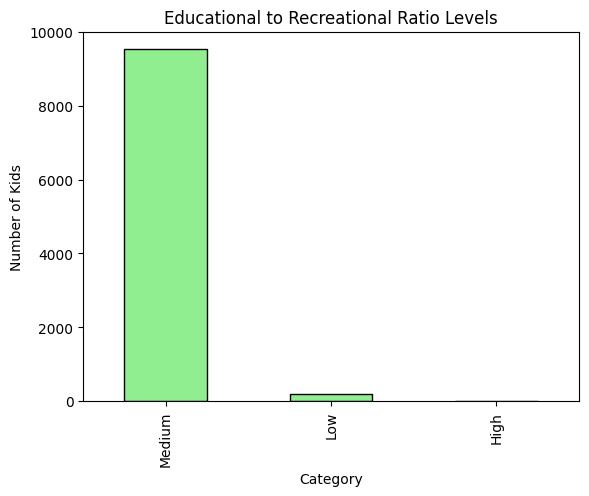

,Age,Gender,Avg_Daily_Screen_Time_hr,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Age_Band,Device_Laptop,Device_Smartphone,Device_TV,Device_Tablet,Edu_Recreation_Level
0,14,Male,3.99,True,0.42,"Poor Sleep, Eye Strain",Urban,Pre-Teen,False,True,False,False,Medium
1,11,Female,4.61,True,0.30,Poor Sleep,Urban,Pre-Teen,True,False,False,False,Low
2,18,Female,3.73,True,0.32,Poor Sleep,Urban,Teenager,False,False,True,False,Medium
3,15,Female,1.21,False,0.39,NaN,Urban,Teenager,True,False,False,False,Medium
4,12,Female,5.89,True,0.49,"Poor Sleep, Anxiety",Urban,Pre-Teen,False,True,False,False,Medium


In [7]:
#Creating Derived Columns
# Age Bands
bins = [7, 10, 14, 18]
labels = ['Child', 'Pre-Teen', 'Teenager']
df['Age_Band'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Visualizing Age Band distribution
df['Age_Band'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribution of Kids by Age Band")
plt.xlabel("Age Band")
plt.ylabel("Number of Kids")
plt.show()

# For Device Column
if 'Primary_Device' in df.columns:
    df = pd.get_dummies(df, columns=['Primary_Device'], prefix='Device')

# Visulizing Device Usage Preferences
device_cols = [c for c in df.columns if c.startswith("Device_")]
device_usage = df[device_cols].sum().sort_values(ascending=False)
device_usage.plot(kind='bar', color='orange', edgecolor='black')
plt.title("Primary Device Usage")
plt.xlabel("Device")
plt.ylabel("Number of Kids")
plt.show()

# Educational to Recreational Ratio levels
df['Edu_Recreation_Level'] = pd.cut(
    df['Educational_to_Recreational_Ratio'],
    bins=[0,0.3,0.6,1],
    labels=['Low','Medium','High']
)
# Visualizing Educational to Recreational Ratio levels
df['Edu_Recreation_Level'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Educational to Recreational Ratio Levels")
plt.xlabel("Category")
plt.ylabel("Number of Kids")
plt.show()
df.head()

Checking for actual NaN values in Health_Impacts before filling: 3218

Checking for actual NaN values in Health_Impacts after filling: 0

Value counts for Health_Impacts including 'None':


,count
Health_Impacts,
None,3218
Poor Sleep,2268
"Poor Sleep, Eye Strain",979
Eye Strain,644
"Poor Sleep, Anxiety",608
"Poor Sleep, Obesity Risk",452
Anxiety,385
"Poor Sleep, Eye Strain, Anxiety",258
Obesity Risk,252


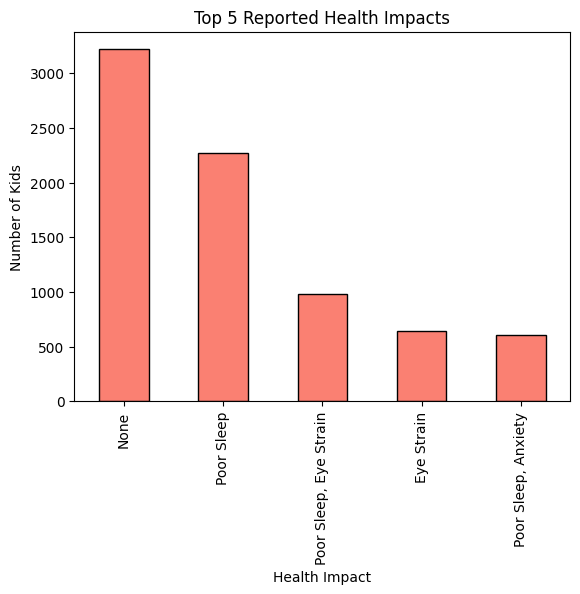

In [17]:
#Handling Missing Values
# Checking for actual NaN values
print("Checking for actual NaN values in Health_Impacts before filling:", df["Health_Impacts"].isnull().sum())

# Filling actual NaN values with the string 'None' as it represents no health impact
df["Health_Impacts"] = df["Health_Impacts"].fillna('None')

# Verifying that there are no more actual NaN values
print("\nChecking for actual NaN values in Health_Impacts after filling:", df["Health_Impacts"].isnull().sum())

# Displaying value counts including the 'None' category to confirm
print("\nValue counts for Health_Impacts including 'None':")
display(df['Health_Impacts'].value_counts(dropna=False))

# Preview updated column
df[["Age", "Avg_Daily_Screen_Time_hr", "Health_Impacts"]].head(15)

# Visualizing Top 5 Health Impacts
df['Health_Impacts'].value_counts().head(5).plot(kind='bar', color='salmon', edgecolor='black')
plt.title("Top 5 Reported Health Impacts")
plt.xlabel("Health Impact")
plt.ylabel("Number of Kids")
plt.show()

In [18]:
#Saving Cleaned Dataset
df.to_csv('Indian_Kids_Screen_Time_Cleaned.csv', index=False)

* * *
# **Week 2 Task Key Insights :-**
* * *
* **Derived Columns Created:**
    * **Age Band:** The dataset was categorized into three age bands: 'Child' (8-10 years), 'Pre-Teen' (11-14 years), and 'Teenager' (15-18 years). The distribution of kids across these age bands is visualized in the generated bar plot.
    * **Primary Device:** One-hot encoding was applied to the `Primary_Device` column, creating new columns for each device type: `Device_Laptop`, `Device_Smartphone`, `Device_TV`, and `Device_Tablet`. The counts for each device are:
        * Smartphone: 4568 kids
        * TV: 2487 kids
        * Laptop: 1433 kids
        * Tablet: 1224 kids
        The primary device usage is visualized in the generated bar plot, showing that smartphones are the most frequently used device.
    * **Educational to Recreational Ratio Level:** This ratio was categorized into 'Low', 'Medium', and 'High' levels based on the bins [0, 0.3, 0.6, 1]. The distribution of these levels is visualized in the generated bar plot.
* **Handling Missing Values:**
    * Missing values in the `Health_Impacts` column (originally 3218 entries) were filled with the string 'None'. This indicates that no health impact was reported for these 3218 entries. The value counts for `Health_Impacts`, including the 'None' category, are shown in the output, highlighting that 'None' is the most frequent category.
* **Cleaned Dataset:** The dataset with the new features and handled missing values has been saved as `Indian_Kids_Screen_Time_Cleaned.csv`.
* * *